In [66]:
from torchvision.io import read_image
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Subset
from generator import generator
import torch
import pickle
from dataset import PixelSceneryDataset

In [72]:
Train_Dir_live="imagenet/"
Train_Dir_pix="pixel/"

#setting up dataset
dataset = PixelSceneryDataset(
        root_scenery=Train_Dir_live,
        root_pixel=Train_Dir_pix,
        
)

with open('train_subset.pkl', 'rb') as f:
        train_indices = pickle.load(f)

with open('val_subset.pkl', 'rb') as f:
        val_indices = pickle.load(f)

train_dataset = Subset(dataset, train_indices)
val_dataset = Subset(dataset, val_indices)

In [73]:
checkpoint = torch.load('train_result.pth')
G_live = generator()
G_live.load_state_dict(checkpoint['G_live_state_dict'])
G_pix = generator()
G_pix.load_state_dict(checkpoint['G_pix_state_dict'])


<All keys matched successfully>

In [74]:
pixel, scenery = val_dataset[10]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


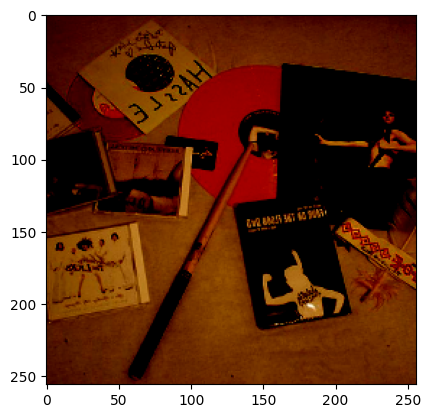

In [75]:
plt.imshow(np.moveaxis(scenery.numpy(), 0, -1))

In [76]:
save_image(G_pix(scenery[None,...]) * 0.5 + 0.5, 'live_gen.png')